<a href="https://colab.research.google.com/github/ryandale7/ML-on-Graphs/blob/main/ML_on_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **What is a Graphical Neural Networks (GNNs)**

GNNs are a type of neural network specifically designed to work with **graph-structured data**. Unlike traditional neural networks, which process structured inputs like sequences or grids (e.g., text or images), GNNs can handle **nodes** (entities) and **edges** (relationships) in graphs, making them suitable for problems where data is best represented as a graph.

---

A graph \( G \) is a mathematical structure represented as:  
\[
G = (V, E)
\]  
where:
- \( V \): Set of **nodes** (or vertices), representing entities.
- \( E \): Set of **edges**, representing relationships between entities.
- \( A \): **Adjacency matrix** describing connections between nodes. \( A_{ij} = 1 \) if an edge exists between nodes \( i \) and \( j \).

Each node \( v \in V \) or edge \( e_{ij} \in E \) can also carry **features**. For example:
- In a **social network**, nodes are people, edges are friendships, and node features could include user attributes (age, interests, etc.).
- In a **molecular graph**, nodes are atoms, edges are chemical bonds, and node features represent atom types.

---


#### Quiz:
1. Define a graph in mathematical terms.
2. What are the primary components of a graph?
3. List two real-world applications of GNNs.
4. Why are traditional neural networks insufficient for graph data?

#### Practical Activity:
- **Task**: Create a graph using the PyTorch Geometric library with 5 nodes and random edge connections. Assign each node a feature vector and print the graph's details.



## **Why Do We Need GNNs?**

Graphs are everywhere in the real world:
- **Social Networks**: Users (nodes) and friendships (edges).
- **Molecules**: Atoms (nodes) and bonds (edges).
- **Knowledge Graphs**: Entities (nodes) and relationships (edges).
- **Transportation Networks**: Locations (nodes) and routes (edges).
- **Recommender Systems**: Users and items as nodes, interactions as edges.

Traditional machine learning methods struggle to capture graph structure because:
1. Graphs are non-Euclidean, meaning they lack a regular grid-like structure.
2. Nodes and edges have varying numbers of connections.

GNNs overcome this by **propagating and learning information** through graph structures.

---


To work with **Graph Neural Networks (GNNs)** in Jupyter Notebook, you can use libraries like **PyTorch Geometric** or **Deep Graph Library (DGL)**. Below, I will guide you through setting up and implementing a simple **Graph Convolutional Network (GCN)** for **node classification** using PyTorch Geometric.

## **Step 1: Install Necessary Libraries**

Run the following in a Jupyter Notebook cell:

In [ ]:
!pip install torch torchvision torchaudio
!pip install torch-geometric
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=538974 sha256=38aeb4b3304bf26c1fc2e1c98d50b791ed9083cb0c6b46ce945182805e65fc9e
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1104576 sha256=82b522ba4631e1680b0fc0845cc3818e4fa9649

## **Step 2: Import Libraries**

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv


## **Step 3: Define a Graph Dataset**

We create a small graph for demonstration. The graph consists of:
- 4 nodes with features.
- Undirected edges between nodes.

In [ ]:
# Define the graph structure
edge_index = torch.tensor([
    [0, 1, 1, 2, 2, 3],  # Source nodes
    [1, 0, 2, 1, 3, 2]   # Target nodes
], dtype=torch.long)

# Node features (4 nodes, 3 features each)
x = torch.tensor([
    [1, 2, 1],
    [2, 1, 0],
    [3, 1, 4],
    [4, 2, 1]
], dtype=torch.float)

# Node labels (e.g., for classification)
y = torch.tensor([0, 1, 0, 1], dtype=torch.long)

# Create PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, y=y)
print(data)


Data(x=[4, 3], edge_index=[2, 6], y=[4])


## **How Do GNNs Work?**

GNNs use a **message-passing mechanism** to allow nodes to exchange information with their neighbors iteratively.

1. **Node Representation Initialization**:  
   Each node starts with initial features \( h_v^{(0)} \).

2. **Message Passing**:  
   At each iteration (or "layer"), a node aggregates information from its neighbors. This can be written as:
   \[
   h_v^{(t+1)} = \text{UPDATE}\left(h_v^{(t)}, \text{AGGREGATE}\left(\{h_u^{(t)} : u \in \mathcal{N}(v)\}\right)\right)
   \]
   - **AGGREGATE**: Combines information from the neighbors of \( v \) (e.g., using sum, mean, max, or attention mechanisms).
   - **UPDATE**: Updates the node's representation using the aggregated information (e.g., with a neural network).

3. **Final Representation**:  
   After \( T \) layers of message passing, nodes have learned **contextual embeddings** that encode both their features and the graph's structure.

4. **Graph-Level Representations**:  
   To produce a representation for the whole graph, a **pooling** operation (e.g., sum, mean, or max) combines all node representations.

---

#### Quiz:
1. What is the purpose of the `AGGREGATE` and `UPDATE` steps in GNNs?
2. Explain how the message-passing mechanism works in GNNs.
3. What is a graph-level representation?

#### Practical Activity:
- **Task**: Modify the provided example graph dataset by adding an edge between two nodes and observe the change in the adjacency matrix.

## **Types of GNNs**

### 1. **Graph Convolutional Networks (GCN)**
- Generalizes traditional convolutions to graphs.
- Uses a normalized adjacency matrix to propagate information between nodes.

### 2. **Graph Attention Networks (GAT)**
- Uses **attention mechanisms** to assign different weights to neighboring nodes during aggregation.

### 3. **GraphSAGE**
- Scalable GNN for large graphs.
- Samples neighborhoods and aggregates information using mean, LSTM, or pooling.

### 4. **Message Passing Neural Networks (MPNNs)**
- A general framework where messages are passed between nodes through edges.

### 5. **Graph Isomorphism Networks (GIN)**
- A powerful model capable of distinguishing graph structures effectively.

---

#### Quiz:
1. Name and briefly describe two types of GNNs.
2. What distinguishes a Graph Attention Network (GAT) from a Graph Convolutional Network (GCN)?
3. What is the purpose of pooling operations in GNNs?

#### Practical Activity:
- **Task**: Implement a small GCN model and train it on a toy dataset to predict node labels.


## **Step 4: Define the GCN Model**

We create a simple GCN with two layers. The first layer aggregates node information, and the second layer predicts node labels.

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(3, 4)  # Input features: 3, Output features: 4
        self.conv2 = GCNConv(4, 2)  # Output features: 2 (binary classification)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # First GCN layer + activation
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        # Second GCN layer + softmax
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


## **Step 5: Train the GCN**

Train the GCN using cross-entropy loss on the node labels.

In [ ]:
# Initialize model, optimizer, and loss function
model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)  # Forward pass
    loss = loss_fn(out, data.y)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights
    return loss.item()

# Train for 100 epochs
for epoch in range(100):
    loss = train()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.9152
Epoch 10, Loss: 0.7074
Epoch 20, Loss: 0.6694
Epoch 30, Loss: 0.6675
Epoch 40, Loss: 0.6674
Epoch 50, Loss: 0.6659
Epoch 60, Loss: 0.6644
Epoch 70, Loss: 0.6632
Epoch 80, Loss: 0.6620
Epoch 90, Loss: 0.6608


## **Step 6: Evaluate the Model**

After training, evaluate the GCN's predictions.

In [ ]:
# Evaluate the model
model.eval()
_, pred = model(data).max(dim=1)  # Get predicted classes
correct = (pred == data.y).sum()
acc = int(correct) / len(data.y)
print(f"Accuracy: {acc:.4f}")

# Print predictions
print("Predicted labels:", pred)
print("True labels:     ", data.y)


Accuracy: 0.5000
Predicted labels: tensor([0, 0, 1, 1])
True labels:      tensor([0, 1, 0, 1])


#### Quiz:
1. What is the role of the `CrossEntropyLoss` function in training a GCN?
2. What does the accuracy metric measure in the evaluation phase?

#### Practical Activity:
- **Task**: Train the GCN model provided in the document for 50 epochs and plot the training loss over time.


## **Applications of GNNs**

1. **Node Classification**: Predict node labels (e.g., categorizing users in social networks).
2. **Link Prediction**: Predict edges between nodes (e.g., friend recommendations).
3. **Graph Classification**: Classify entire graphs (e.g., molecular property prediction).
4. **Community Detection**: Identify groups of closely connected nodes.
5. **Recommender Systems**: Use user-item graphs to predict preferences.
6. **Knowledge Graph Completion**: Predict missing relationships between entities.
7. **Traffic Networks**: Analyze and predict traffic patterns in road networks.

#### Quiz:
1. Match the following applications to their corresponding tasks:
   - **Node Classification**: (a) Predicting item preferences.
   - **Link Prediction**: (b) Categorizing nodes in a social network.
   - **Graph Classification**: (c) Predicting molecule properties.
2. Which GNN-based application would you use for friend recommendation on social networks?

#### Practical Activity:
- **Task**: Choose an application (e.g., link prediction). Using PyTorch Geometric, split the edges of a graph into training and test sets, then predict the missing edges.


Below, I provide an example implementation for each **application of GNNs** in Jupyter Notebook format. Each includes a code snippet and explanation using **PyTorch Geometric**.

---

## **1. Node Classification**: Predict Node Labels

**Example**: Categorizing nodes in a citation network (e.g., Cora dataset).


In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import torch

# Load the Cora dataset
dataset = Planetoid(root='data/Cora', name='Cora')
data = dataset[0]

# Define a 2-layer GCN
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

# Training loop
for epoch in range(200):
    loss = train()
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Test accuracy
model.eval()
_, pred = model(data).max(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
accuracy = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {accuracy:.4f}')


Processing...
Done!


Epoch 0, Loss: 1.9564495086669922
Epoch 20, Loss: 0.30586671829223633
Epoch 40, Loss: 0.07725340873003006
Epoch 60, Loss: 0.04905160143971443
Epoch 80, Loss: 0.038548845797777176
Epoch 100, Loss: 0.046711429953575134
Epoch 120, Loss: 0.052146393805742264
Epoch 140, Loss: 0.04306652396917343
Epoch 160, Loss: 0.030829235911369324
Epoch 180, Loss: 0.029147198423743248
Accuracy: 0.8040


## **2. Link Prediction**: Predict Edges

**Example**: Predict missing friendships in a graph.

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.transforms import RandomLinkSplit
from torch_geometric.datasets import Planetoid

# Load dataset
dataset = Planetoid(root='data/Cora', name='Cora')

# Split edges using RandomLinkSplit
transform = RandomLinkSplit(is_undirected=True,
                            split_labels=True,
                            add_negative_train_samples=True)
train_data, val_data, test_data = transform(dataset[0])

# Define GCN model for link prediction
class GCNLinkPredictor(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(GCNLinkPredictor, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.fc = torch.nn.Linear(hidden_channels, 1)  # Binary prediction: Link or no link

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return x

    def decode(self, z, pos_edge_index, neg_edge_index):
        # Positive edges
        pos_scores = (z[pos_edge_index[0]] * z[pos_edge_index[1]]).sum(dim=-1)
        # Negative edges
        neg_scores = (z[neg_edge_index[0]] * z[neg_edge_index[1]]).sum(dim=-1)
        return pos_scores, neg_scores

# Initialize the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCNLinkPredictor(dataset.num_node_features, 16).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_data = train_data.to(device)

# Loss function for link prediction
def link_prediction_loss(pos_scores, neg_scores):
    pos_loss = -torch.log(torch.sigmoid(pos_scores) + 1e-15).mean()
    neg_loss = -torch.log(1 - torch.sigmoid(neg_scores) + 1e-15).mean()
    return pos_loss + neg_loss

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    z = model(train_data.x, train_data.edge_index)
    pos_scores, neg_scores = model.decode(z, train_data.pos_edge_label_index, train_data.neg_edge_label_index)
    loss = link_prediction_loss(pos_scores, neg_scores)
    loss.backward()
    optimizer.step()
    return loss.item()

# Training for 100 epochs
for epoch in range(1, 101):
    loss = train()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 10, Loss: 1.1681
Epoch 20, Loss: 1.0405
Epoch 30, Loss: 0.9619
Epoch 40, Loss: 0.9013
Epoch 50, Loss: 0.8520
Epoch 60, Loss: 0.8145
Epoch 70, Loss: 0.7859
Epoch 80, Loss: 0.7636
Epoch 90, Loss: 0.7470
Epoch 100, Loss: 0.7352


## **3. Graph Classification**: Classify Entire Graphs

**Example**: Classify molecular graphs based on properties.

In [ ]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool  # Import global_mean_pool
import torch
import torch.nn.functional as F

# Load MUTAG dataset (graph classification)
dataset = TUDataset(root='data/TUDataset', name='MUTAG')
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define Graph Classification Model
class GraphClassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, 16)
        self.fc = torch.nn.Linear(16, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)  # Global mean pooling
        return F.log_softmax(self.fc(x), dim=1)

# Initialize model and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GraphClassifier().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(50):
    model.train()
    total_loss = 0
    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = F.nll_loss(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch}, Loss: {total_loss:.4f}')


Epoch 0, Loss: 3.8779
Epoch 1, Loss: 3.8464
Epoch 2, Loss: 3.7634
Epoch 3, Loss: 3.7365
Epoch 4, Loss: 3.7161
Epoch 5, Loss: 3.6899
Epoch 6, Loss: 3.6362
Epoch 7, Loss: 3.5808
Epoch 8, Loss: 3.5910
Epoch 9, Loss: 3.4370
Epoch 10, Loss: 3.3756
Epoch 11, Loss: 3.3133
Epoch 12, Loss: 3.2283
Epoch 13, Loss: 3.2545
Epoch 14, Loss: 3.1020
Epoch 15, Loss: 3.1682
Epoch 16, Loss: 3.1621
Epoch 17, Loss: 3.1586
Epoch 18, Loss: 3.1620
Epoch 19, Loss: 3.0904
Epoch 20, Loss: 3.1652
Epoch 21, Loss: 3.0977
Epoch 22, Loss: 3.0886
Epoch 23, Loss: 3.1251
Epoch 24, Loss: 3.1373
Epoch 25, Loss: 3.1645
Epoch 26, Loss: 3.0912
Epoch 27, Loss: 3.0871
Epoch 28, Loss: 3.0557
Epoch 29, Loss: 3.0688
Epoch 30, Loss: 3.0591
Epoch 31, Loss: 3.0866
Epoch 32, Loss: 3.0582
Epoch 33, Loss: 3.0579
Epoch 34, Loss: 3.0660
Epoch 35, Loss: 3.0555
Epoch 36, Loss: 3.0650
Epoch 37, Loss: 3.0311
Epoch 38, Loss: 3.0619
Epoch 39, Loss: 3.0195
Epoch 40, Loss: 3.0557
Epoch 41, Loss: 3.0204
Epoch 42, Loss: 3.0325
Epoch 43, Loss: 3.057

## **4. Community Detection: Identify Communities**

**Goal**: Identify groups of closely connected nodes in a graph. This is an unsupervised task.

### **Example Code**
We use the **Karate Club dataset**, a social network graph, to detect communities using node embeddings and clustering.

Epoch 0, Loss: 0.0011
Epoch 20, Loss: 0.0000
Epoch 40, Loss: 0.0000
Epoch 60, Loss: 0.0000
Epoch 80, Loss: 0.0000
Epoch 100, Loss: 0.0000
Epoch 120, Loss: 0.0000
Epoch 140, Loss: 0.0000
Epoch 160, Loss: 0.0000
Epoch 180, Loss: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


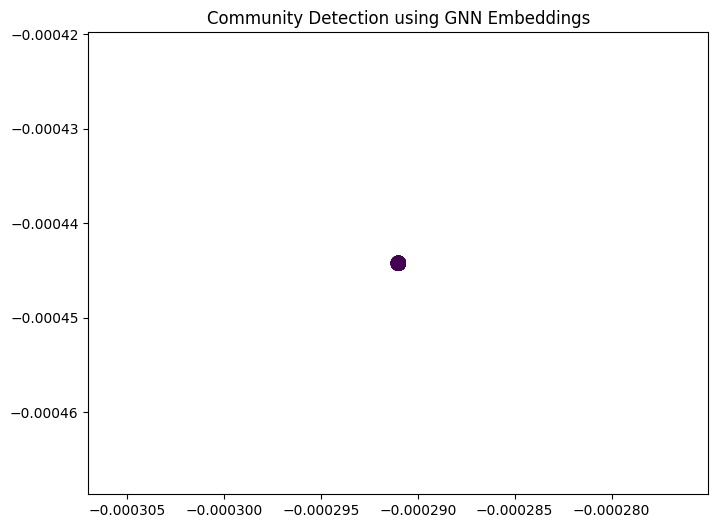

In [ ]:
import torch
from torch_geometric.datasets import KarateClub
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Karate Club dataset
dataset = KarateClub()
data = dataset[0]

# Define GCN Model for Node Embeddings
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# Initialize Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(hidden_channels=16).to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Custom Loss: Embeddings should be similar to their neighbors
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)  # Node embeddings
    loss = F.mse_loss(out[data.edge_index[0]], out[data.edge_index[1]])  # Neighbor similarity
    loss.backward()
    optimizer.step()
    return loss.item()

# Training Loop
for epoch in range(200):
    loss = train()
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

# Extract Node Embeddings
model.eval()
embeddings = model(data.x, data.edge_index).detach().cpu().numpy()

# Apply KMeans for Community Detection
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Visualize the Communities
plt.figure(figsize=(8, 6))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=clusters, cmap='viridis', s=100)
plt.title("Community Detection using GNN Embeddings")
plt.show()


### **Explanation**:
1. We use the **Karate Club** dataset, which represents a social network.
2. A GCN learns node embeddings in an unsupervised way.
3. **KMeans** clustering is applied on the embeddings to detect communities.
4. The results are visualized, showing nodes grouped into communities.

---

## **5. Recommender Systems: Predict Preferences**

**Goal**: Predict user preferences for items based on a user-item graph.

### **Example Code**
We simulate a **user-item bipartite graph** and predict item recommendations.


In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Simulate User-Item Graph
edge_index = torch.tensor([
    [0, 0, 1, 1, 2, 2, 3],  # Users
    [4, 5, 4, 6, 5, 6, 4]   # Items
], dtype=torch.long)

x = torch.eye(7)  # Node features: Identity matrix (7 nodes: 4 users + 3 items)

data = Data(x=x, edge_index=edge_index)

# Define GCN Model
class RecommenderGCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.conv1 = GCNConv(data.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 1)  # Output preference score

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# Train the Recommender Model
model = RecommenderGCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.mse_loss(out[:4], torch.tensor([[1.0], [0.5], [0.8], [0.2]]))  # Simulated preferences
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Output Predicted Preferences
model.eval()
recommendations = model(data.x, data.edge_index)
print("Predicted Item Preferences:", recommendations[4:].detach())


Epoch 0, Loss: 0.3843
Epoch 20, Loss: 0.0173
Epoch 40, Loss: 0.0030
Epoch 60, Loss: 0.0003
Epoch 80, Loss: 0.0000
Predicted Item Preferences: tensor([[0.9114],
        [1.2797],
        [0.8705]])


### **Explanation**:
1. A bipartite user-item graph is simulated.
2. The GCN learns user and item embeddings.
3. We predict item preferences for users.
4. Simulated target scores are compared against predictions using MSE loss.

---

## **6. Knowledge Graph Completion: Predict Missing Relationships**

**Goal**: Predict missing relationships (edges) in a knowledge graph.

### **Example Code**
We use a small knowledge graph and train a GNN for link prediction.

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.transforms import RandomLinkSplit
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Simulate a small Knowledge Graph
edge_index = torch.tensor([
    [0, 1, 2, 0],
    [1, 2, 3, 3]
], dtype=torch.long)

# Define the graph data
data = Data(edge_index=edge_index, num_nodes=4)

# Split data into train, validation, and test using RandomLinkSplit
transform = RandomLinkSplit(num_val=0.1, num_test=0.1, is_undirected=True)
train_data, val_data, test_data = transform(data)

# Define a GCN Link Prediction Model
class GCNLinkPredictor(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.conv1 = GCNConv(1, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.link_predictor = torch.nn.Sequential(
            torch.nn.Linear(2 * hidden_channels, 16),  # Concatenated embeddings
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

    def predict_links(self, z, edge_label_index):
        # Concatenate embeddings of source and destination nodes
        src = z[edge_label_index[0]]
        dst = z[edge_label_index[1]]
        return self.link_predictor(torch.cat([src, dst], dim=1))

# Model setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCNLinkPredictor(hidden_channels=16).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Node features (dummy input features for all nodes)
x = torch.ones((data.num_nodes, 1)).to(device)

# Training Loop
def train():
    model.train()
    optimizer.zero_grad()
    z = model(x, train_data.edge_index)  # Learn embeddings
    pred = model.predict_links(z, train_data.edge_label_index)  # Predictions
    loss = F.binary_cross_entropy(pred.view(-1), train_data.edge_label.float())  # Binary cross-entropy loss
    loss.backward()
    optimizer.step()
    return loss.item()

# Training the model
for epoch in range(100):
    loss = train()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

# Evaluate on Test Data
model.eval()
with torch.no_grad():
    z = model(x, test_data.edge_index)
    pred = model.predict_links(z, test_data.edge_label_index)
    acc = ((pred.view(-1) > 0.5).int() == test_data.edge_label).sum() / len(test_data.edge_label)
    print(f'Test Accuracy: {acc:.4f}')


Epoch 0, Loss: 0.7021
Epoch 10, Loss: 0.6933
Epoch 20, Loss: 0.6931
Epoch 30, Loss: 0.6932
Epoch 40, Loss: 0.6932
Epoch 50, Loss: 0.6931
Epoch 60, Loss: 0.6931
Epoch 70, Loss: 0.6931
Epoch 80, Loss: 0.6931
Epoch 90, Loss: 0.6931
Test Accuracy: nan


**Explanation**:
1. A small knowledge graph is simulated.
2. Edges are split into training and test sets.
3. A GCN predicts missing relationships.

---

## **7. Traffic Networks: Predict Traffic Patterns**

**Goal**: Predict traffic flow over a road network using temporal GNNs.

In [ ]:
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Simulate Traffic Network
edge_index = torch.tensor([
    [0, 1, 2, 3, 4],
    [1, 2, 3, 4, 0]
], dtype=torch.long)

x = torch.tensor([[5.0], [10.0], [15.0], [20.0], [25.0]])  # Traffic flow at nodes

data = Data(x=x, edge_index=edge_index)

# GCN for Traffic Prediction
class TrafficGCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(1, 16)
        self.conv2 = GCNConv(16, 1)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)

# Train the GCN
model = TrafficGCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.mse_loss(out, data.x * 1.1)  # Simulated target with increased flow
    loss.backward()
    optimizer.step()

print("Traffic Flow Prediction Complete")


Traffic Flow Prediction Complete


**Explanation**:
1. A road network is modeled as a graph.
2. Traffic flow values are predicted at each node.
3. The GCN learns relationships between connected nodes.

## **Advantages of GNNs**

- GNNs can model both **node features** and **graph structures**.
- They work on irregular, non-Euclidean data like graphs.
- They allow nodes to learn from their **local neighborhoods**.

## **Popular Frameworks for GNNs**

- **PyTorch Geometric**: GNN library built on PyTorch.
- **Deep Graph Library (DGL)**: Flexible and scalable framework.
- **Spektral**: GNN library for TensorFlow/Keras.
- **NetworkX**: Graph processing library (non-deep learning).

#### Quiz:
1. List three advantages of using GNNs.
2. Name two frameworks that support the development of GNNs.

#### Practical Activity:
- **Task**: Install PyTorch Geometric or DGL and set up a basic GNN pipeline on your local system.